<a href="https://colab.research.google.com/github/audrb1999/Python_image/blob/main/git_hub3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***6. Contours 찾기!***

##cv2.findContours(image, mode, method)

윤곽선(컨투어)

> mode : Contours들을 찾는 방법
1. RETR_EXTERNAL : 바깥쪽 Line만 찾기
2. RETR_LIST : 모든 Line을 찾지만, Hierarchy 구성 x
3. RETR_TREE : 모든 Line을 찾으며 모든 Hierarchy 구성 o

> method : Countor들을 찾는 근사치 방법
1. CHAIN_APPROX_NONE: 모든 Contour들을 찾는 근사치 방법
2. CHAIN_APPROX_SIMPLE : Countour Line을 그릴 수 있는 포인트만 저장

### 입력 이미지는 Gray Scake Threshold 전처리 과정이 필요!


In [1]:
#contour 는 외각을 의미 즉 이미지 외곽을 전처리하는 것
# 어떤 image 안에서 외각을 찾는 것!> 각각의 숫자들을 앵커 박스로 감싸는 것! 이미지 구분 및 좌표도 받을 수 있음! > 다양한 오브젝트를 테두리로 구분해 찾음
# 타입 테두리를 찾을 때 바깥을 찾을 건지 모두 찾을 건지 설정함!
# 바이너리로 이진화한 다음 컨투어 가능!

##cv2.drawContours( image, contours, contour_index, color, thickness )

이미지에 해당 컨투어를 그릴 수 있게 해줌! > 어떤 컨투어를 그릴지 그리고 색깔이랑 두께도 설정 가능!

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gray_image.jpg to gray_image.jpg


cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법)을 의미합니다.

반환값으로 윤곽선, 계층 구조를 반환합니다.

윤곽선은 Numpy 구조의 배열로 검출된 윤곽선의 지점들이 담겨있습니다.   > 인덱스로 지점 선택!

계층 구조는 윤곽선의 계층 구조를 의미합니다. 각 윤곽선에 해당하는 속성 정보들이 담겨있습니다.

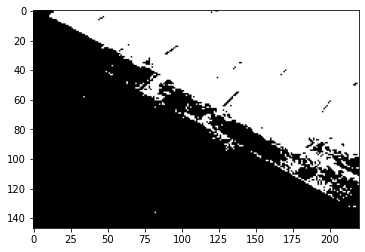

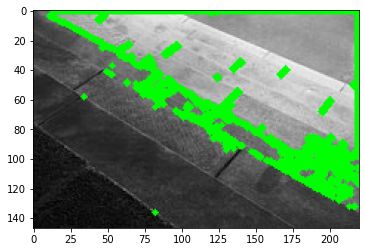

In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg')#넘파이 객체로 읽어오고
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# 넘파이 객체값들을 색깔로 표현! > BGR형태의 채널 데이터를 GRAY값으로 바꿈!
ret, thresh = cv2.threshold(image_gray, 127, 255, 0)#thresh 에 이미지 행렬이 들어가고 ret에는 문턱값이 들어감

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]#thresh 에 대한 모든 contour를 찾음!
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 4)# 그걸 그림! 두께 4로! 괄호 안의 값은(B, G, R)임!

# -1은 모든 컨투어를 다 그린 것이고 0, 1, 2...등등을 넣어보면 점 하나만 찍히는데 그게 그 인데스의 컨투어! > 그걸 모두 찍은게 -1 !

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


바깥쪽만 찾아보자!

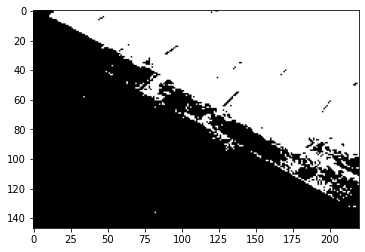

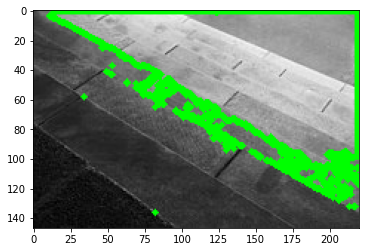

In [4]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 127, 255, 0)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours,  hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# 이게 2개의 값을 반환 [0]은 contours 1은hierarchy [1]로는 못 그림
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
